### Logistic Regression with Mini-Batch Gradient Descent using TensorFlow

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(42)
print(sklearn.__version__)

0.18.1


In [2]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise=0.1, random_state=42)

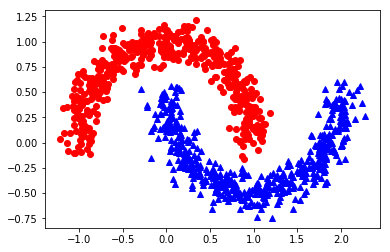

In [4]:
fig = plt.figure()
plt.plot(X_moons[y_moons==0, 0], X_moons[y_moons==0, 1], "ro")
plt.plot(X_moons[y_moons==1, 0], X_moons[y_moons==1, 1], "b^")
plt.show()

In [4]:
X_moon_with_bias = np.c_[np.ones((1000,1)), X_moons]
y_reshaped = y_moons.reshape(-1,1)
X_moon_train, X_moon_test = X_moon_with_bias[:700], X_moon_with_bias[700:]
y_moon_train, y_moon_test = y_reshaped[:700], y_reshaped[700:]

In [5]:
def random_patch(X, y, batch_size):
    rnd_idx = np.random.randint(0, len(X), batch_size)
    X_batch = X[rnd_idx]
    y_batch = y[rnd_idx]
    return X_batch, y_batch

In [333]:
reset_graph()

In [334]:
n = X_moon_with_bias.shape[1]
X = tf.placeholder(dtype=tf.float32, shape=(None, n), name="X")
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n,1], -1.0, 1.0, seed=42), name="theta")
logits = tf.matmul(X, theta, name="logits")
y_proba = 1/(1+tf.exp(-logits))

In [335]:
loss = tf.losses.log_loss(y, y_proba)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
training_op = optimizer.minimize(loss)

In [336]:
init = tf.global_variables_initializer()

In [337]:
iterations = 500 
batch_size = 50
n_batches = np.int(np.ceil(1000/batch_size))
with tf.Session() as sess:
    init.run()
    for epoch in range(iterations):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_patch(X_moon_train, y_moon_train, 50)
            sess.run(training_op, {X: X_batch, y: y_batch})
        loss_val = loss.eval(feed_dict={X:X_moon_test, y:y_moon_test})
        if epoch%50==0:
            print("Epoch:{0}, Loss:{1}".format(epoch, loss_val))
    y_proba_eval = y_proba.eval(feed_dict={X:X_moon_test})

Epoch:0, Loss:0.821357011795044
Epoch:50, Loss:0.3621046841144562
Epoch:100, Loss:0.3013417422771454
Epoch:150, Loss:0.27537399530410767
Epoch:200, Loss:0.2601950168609619
Epoch:250, Loss:0.2504417896270752
Epoch:300, Loss:0.24319951236248016
Epoch:350, Loss:0.23835469782352448
Epoch:400, Loss:0.23462969064712524
Epoch:450, Loss:0.23181894421577454


In [338]:
y_pred = np.where(y_proba_eval>0.5, 1, 0)
y_pred[:5]

array([[1],
       [1],
       [1],
       [0],
       [1]])

In [339]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_pred, y_test)

0.90000000000000002

In [340]:
recall_score(y_pred, y_test)

0.91082802547770703

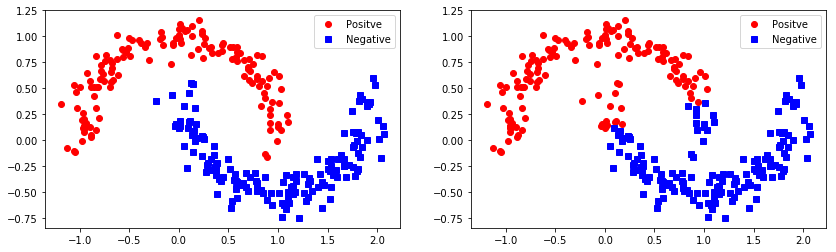

In [341]:
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_moon_test[(y_moon_test==0).flatten(), 1], X_moon_test[(y_moon_test==0).flatten(), 2], "ro", label="Positve")
plt.plot(X_moon_test[(y_moon_test==1).flatten(), 1], X_moon_test[(y_moon_test==1).flatten(), 2], "bs", label="Negative")
plt.legend()

plt.subplot(122)
plt.plot(X_moon_test[(y_pred==0).flatten(), 1], X_moon_test[(y_pred==0).flatten(), 2], "ro", label="Positve")
plt.plot(X_moon_test[(y_pred==1).flatten(), 1], X_moon_test[(y_pred==1).flatten(), 2], "bs", label="Negative")
plt.legend()

plt.show()

Start over by adding all the bells and whistles
* Define the graph within a `logistic_regression()` function that can be reused easily.
* Save checkpoints using a `Saver` at regular intervals during training, and save the final model at the end of training.
* Restore the last checkpoint upon startup if training was interrupted.
* Define the graph using nice scopes so the graph looks good in TensorBoard.
* Add summaries to visualize the learning curves in TensorBoard.
* Try tweaking some hyperparameters such as the learning rate or the mini-batch size and look at the shape of the learning curve.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
X_moon_train_transformed = PolynomialFeatures(degree=3).fit_transform(X_moon_train)
X_moon_test_transformed = PolynomialFeatures(degree=3).fit_transform(X_moon_test)

In [7]:
X_moon_test_transformed[:3]

array([[  1.00000000e+00,   1.00000000e+00,   1.30399966e+00,
         -5.43294612e-01,   1.00000000e+00,   1.30399966e+00,
         -5.43294612e-01,   1.70041512e+00,  -7.08455989e-01,
          2.95169035e-01,   1.00000000e+00,   1.30399966e+00,
         -5.43294612e-01,   1.70041512e+00,  -7.08455989e-01,
          2.95169035e-01,   2.21734074e+00,  -9.23826370e-01,
          3.84900322e-01,  -1.60363746e-01],
       [  1.00000000e+00,   1.00000000e+00,   3.87982399e-01,
         -5.13610232e-01,   1.00000000e+00,   3.87982399e-01,
         -5.13610232e-01,   1.50530342e-01,  -1.99271730e-01,
          2.63795470e-01,   1.00000000e+00,   3.87982399e-01,
         -5.13610232e-01,   1.50530342e-01,  -1.99271730e-01,
          2.63795470e-01,   5.84031232e-02,  -7.73139239e-02,
          1.02347999e-01,  -1.35488053e-01],
       [  1.00000000e+00,   1.00000000e+00,   2.04122428e+00,
         -1.65462447e-01,   1.00000000e+00,   2.04122428e+00,
         -1.65462447e-01,   4.16659658e+00

In [8]:
reset_graph()

In [9]:
def logistic_regression(X, y, learning_rate=0.01, seed=42): # X and y are tf placeholders
    n = int(X.get_shape()[1]) # number of features
    with tf.name_scope("logistic_regression"):
        theta = tf.Variable(tf.random_uniform([n,1], -1.0, 1.0, seed=seed), name="theta")
        logits = tf.matmul(X, theta, name="logits")
        y_proba = tf.sigmoid(logits)
    with tf.name_scope("train"):
        loss = tf.losses.log_loss(y, y_proba)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        training_op = optimizer.minimize(loss)
        loss_summary = tf.summary.scalar("log_loss", loss)
    with tf.name_scope("init"):
        init = tf.global_variables_initializer()
    with tf.name_scope("save"):
        saver = tf.train.Saver()
    return y_proba, loss, training_op, loss_summary, init, saver

In [10]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{0}/{1}/".format(root_logdir, name)

In [12]:
n = X_moon_train_transformed.shape[1]
logdir = log_dir("logreg")

X = tf.placeholder(dtype=tf.float32, shape=(None, n), name="X")
y = tf.placeholder(dtype=tf.float32, shape=(None,1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

#file_writer = tf.summary.FileWriter(logdir=logdir, graph=tf.get_default_graph())

In [13]:
import os
n_epoches = 10001
batch_size = 50
batches = int(np.ceil(1000/batch_size))


# checkpoint_path = "/tmp/my_logreg_model.ckpt"
# checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    start_epoch = 0
    sess.run(init)
#     if os.path.isfile(checkpoint_epoch_path):
#         with open(checkpoint_epoch_path, "rb") as f:
#             start_epoch = int(f.read())
#         print("Training was interrupted. Continuing at epoch", start_epoch)
#         saver.restore(sess, checkpoint_path)
#     else:
#         start_epoch = 0
#         sess.run(init)
    for epoch in range(start_epoch, n_epoches):
        for batch_index in range(batches):
            X_batch, y_batch = random_patch(X_moon_train_transformed, y_moon_train, batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X:X_moon_test_transformed, y:y_moon_test})

        #file_writer.add_summary(summary_str, epoch)
        if epoch%500 == 0:
            print("Epoch:{0}, loss:{1}".format(epoch, loss_val))
#             saver.save(sess, checkpoint_path)
#             with open(checkpoint_epoch_path, "wb") as f:
#                 f.write(b"%d" % (epoch + 1))
    y_proba_val = sess.run(y_proba, feed_dict={X:X_moon_test_transformed})
    saver.save(sess, final_model_path)
#   os.remove(checkpoint_epoch_path)

Epoch:0, loss:0.46179312467575073
Epoch:500, loss:0.09851544350385666
Epoch:1000, loss:0.0694865956902504
Epoch:1500, loss:0.05533203110098839
Epoch:2000, loss:0.04686884582042694
Epoch:2500, loss:0.04144919291138649
Epoch:3000, loss:0.03735707700252533
Epoch:3500, loss:0.03387782722711563
Epoch:4000, loss:0.03150632232427597
Epoch:4500, loss:0.0293304193764925
Epoch:5000, loss:0.02790766954421997
Epoch:5500, loss:0.0264726709574461
Epoch:6000, loss:0.02518301270902157
Epoch:6500, loss:0.024182846769690514
Epoch:7000, loss:0.023259811103343964
Epoch:7500, loss:0.022479820996522903
Epoch:8000, loss:0.02179284580051899
Epoch:8500, loss:0.02112344466149807
Epoch:9000, loss:0.020582977682352066
Epoch:9500, loss:0.02004995010793209
Epoch:10000, loss:0.019584061577916145


In [29]:
from sklearn.metrics import accuracy_score, recall_score
y_pred = np.where(y_proba_val>0.5, 1, 0)
accuracy_score(y_pred, y_moon_test)

0.98757763975155277

In [30]:
recall_score(y_pred, y_moon_test)

0.98757763975155277

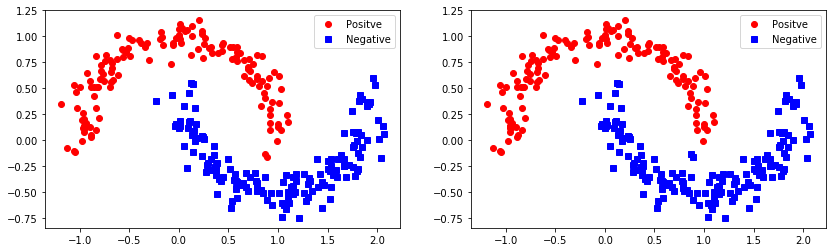

In [31]:
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_moon_test[(y_moon_test==0).flatten(), 1], X_moon_test[(y_moon_test==0).flatten(), 2], "ro", label="Positve")
plt.plot(X_moon_test[(y_moon_test==1).flatten(), 1], X_moon_test[(y_moon_test==1).flatten(), 2], "bs", label="Negative")
plt.legend()

plt.subplot(122)
plt.plot(X_moon_test[(y_pred==0).flatten(), 1], X_moon_test[(y_pred==0).flatten(), 2], "ro", label="Positve")
plt.plot(X_moon_test[(y_pred==1).flatten(), 1], X_moon_test[(y_pred==1).flatten(), 2], "bs", label="Negative")
plt.legend()

plt.show()